In [1]:
# importing necessary libraries

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing the data

df = pd.read_csv('drive/MyDrive/Data/daily-total-female-births-CA.csv')

In [3]:
# First five records

df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
# Checking the data types

df.dtypes

date      object
births     int64
dtype: object

In [5]:
# checking unique values

df['date'].unique()

array(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
       '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
       '1959-01-09', '1959-01-10', '1959-01-11', '1959-01-12',
       '1959-01-13', '1959-01-14', '1959-01-15', '1959-01-16',
       '1959-01-17', '1959-01-18', '1959-01-19', '1959-01-20',
       '1959-01-21', '1959-01-22', '1959-01-23', '1959-01-24',
       '1959-01-25', '1959-01-26', '1959-01-27', '1959-01-28',
       '1959-01-29', '1959-01-30', '1959-01-31', '1959-02-01',
       '1959-02-02', '1959-02-03', '1959-02-04', '1959-02-05',
       '1959-02-06', '1959-02-07', '1959-02-08', '1959-02-09',
       '1959-02-10', '1959-02-11', '1959-02-12', '1959-02-13',
       '1959-02-14', '1959-02-15', '1959-02-16', '1959-02-17',
       '1959-02-18', '1959-02-19', '1959-02-20', '1959-02-21',
       '1959-02-22', '1959-02-23', '1959-02-24', '1959-02-25',
       '1959-02-26', '1959-02-27', '1959-02-28', '1959-03-01',
       '1959-03-02', '1959-03-03', '1959-03-04', '1959-

In [6]:
# parsing the datetime columns

df['date'] = pd.to_datetime(df['date'])
df.dtypes

date      datetime64[ns]
births             int64
dtype: object

In [7]:
df.tail()

,date,births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [8]:
# converting the dataframe to series
#pd.Series(data = df, index = 'date')

series = df.set_index('date').squeeze()

In [9]:
# Exploring the data

series.shape

(365,)

In [10]:
df.shape

(365, 2)

In [11]:
#Quering by time

series['1959-03']

date
1959-03-01    35
1959-03-02    28
1959-03-03    45
1959-03-04    34
1959-03-05    36
1959-03-06    50
1959-03-07    44
1959-03-08    39
1959-03-09    32
1959-03-10    39
1959-03-11    45
1959-03-12    43
1959-03-13    39
1959-03-14    31
1959-03-15    27
1959-03-16    30
1959-03-17    42
1959-03-18    46
1959-03-19    41
1959-03-20    36
1959-03-21    45
1959-03-22    46
1959-03-23    43
1959-03-24    38
1959-03-25    34
1959-03-26    35
1959-03-27    56
1959-03-28    36
1959-03-29    32
1959-03-30    50
1959-03-31    41
Name: births, dtype: int64

In [12]:
# Descriptive Statistics

series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [13]:
# Feature Engineering

#Date time features

features = df.copy()
features.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [14]:
features['year'] = features['date'].dt.year

In [15]:
features['month'] = features['date'].dt.month

In [16]:
features['day'] = features['date'].dt.day

In [17]:
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [18]:
# Lag features

features['lag1'] = features['births'].shift(1)

In [19]:
features.head()

,date,births,year,month,day,lag1
0,1959-01-01,35,1959,1,1,NaN
1,1959-01-02,32,1959,1,2,35.0
2,1959-01-03,30,1959,1,3,32.0
3,1959-01-04,31,1959,1,4,30.0
4,1959-01-05,44,1959,1,5,31.0


In [20]:
features.tail()

,date,births,year,month,day,lag1
360,1959-12-27,37,1959,12,27,34.0
361,1959-12-28,52,1959,12,28,37.0
362,1959-12-29,48,1959,12,29,52.0
363,1959-12-30,55,1959,12,30,48.0
364,1959-12-31,50,1959,12,31,55.0


In [21]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   births  365 non-null    int64         
 2   year    365 non-null    int64         
 3   month   365 non-null    int64         
 4   day     365 non-null    int64         
 5   lag1    364 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 17.2 KB


In [22]:
#Window features

features['roll_mean_2'] = features['births'].rolling(window = 2).mean()

In [23]:
features.head()

,date,births,year,month,day,lag1,roll_mean_2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,33.5
2,1959-01-03,30,1959,1,3,32.0,31.0
3,1959-01-04,31,1959,1,4,30.0,30.5
4,1959-01-05,44,1959,1,5,31.0,37.5


In [24]:
features.tail()

,date,births,year,month,day,lag1,roll_mean_2
360,1959-12-27,37,1959,12,27,34.0,35.5
361,1959-12-28,52,1959,12,28,37.0,44.5
362,1959-12-29,48,1959,12,29,52.0,50.0
363,1959-12-30,55,1959,12,30,48.0,51.5
364,1959-12-31,50,1959,12,31,55.0,52.5


In [25]:
# Expanding features

features['expand_max'] = features['births'].expanding().max()

In [26]:
features.head()

,date,births,year,month,day,lag1,roll_mean_2,expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,33.5,35.0
2,1959-01-03,30,1959,1,3,32.0,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,30.5,35.0
4,1959-01-05,44,1959,1,5,31.0,37.5,44.0


In [27]:
#Downsampling

features[['date','births']].resample('Q', on = "date").sum()

,births
date,
1959-03-31,3579
1959-06-30,3615
1959-09-30,4097
1959-12-31,4032


In [28]:
#Downsampling

features[['date','births']].resample('A', on = "date").sum()

,births
date,
1959-12-31,15323


In [29]:
#Upsampling

((features[['date','births']].resample('Q', on = "date").sum()).reset_index().resample('M', on = "date").mean()).interpolate(method = 'linear')

,births
date,
1959-03-31,3579.000000
1959-04-30,3591.000000
1959-05-31,3603.000000
1959-06-30,3615.000000
1959-07-31,3775.666667
1959-08-31,3936.333333
1959-09-30,4097.000000
1959-10-31,4075.333333
1959-11-30,4053.666667


In [30]:
df_viz = df.copy()
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


<Axes: xlabel='date'>

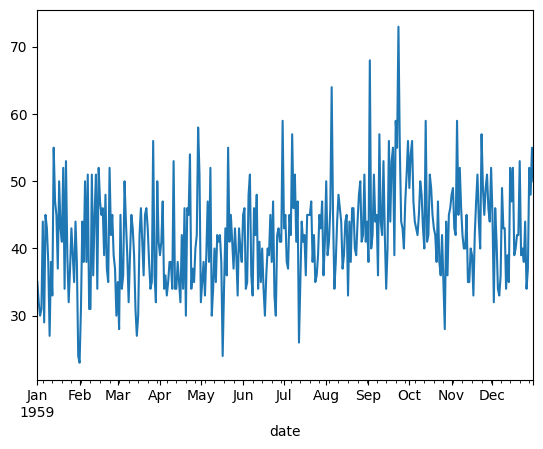

In [31]:
#line chart

df_viz.set_index('date', inplace = True)
df_viz['births'].plot()

In [32]:
df_viz = df_viz.squeeze()
df_viz.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [33]:
type(df_viz)

pandas.core.series.Series

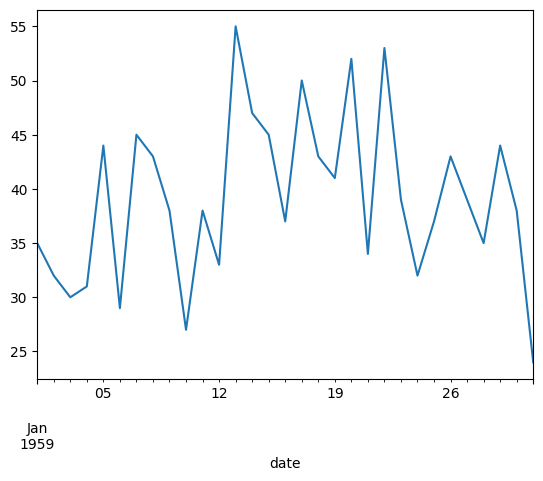

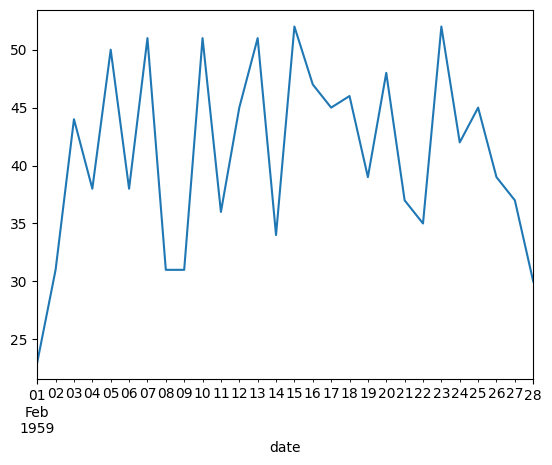

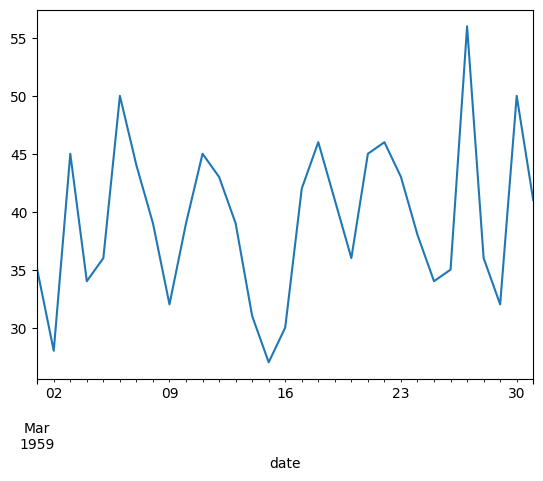

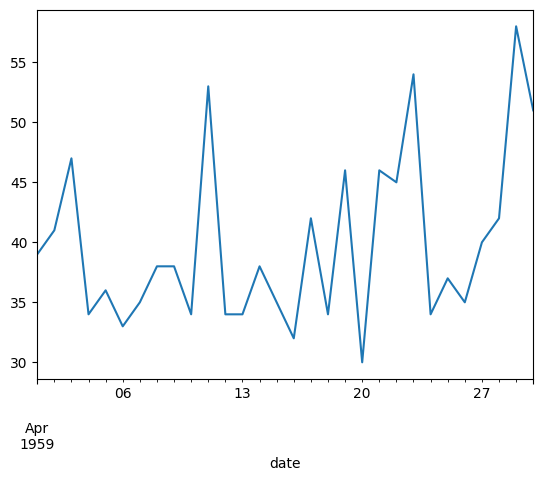

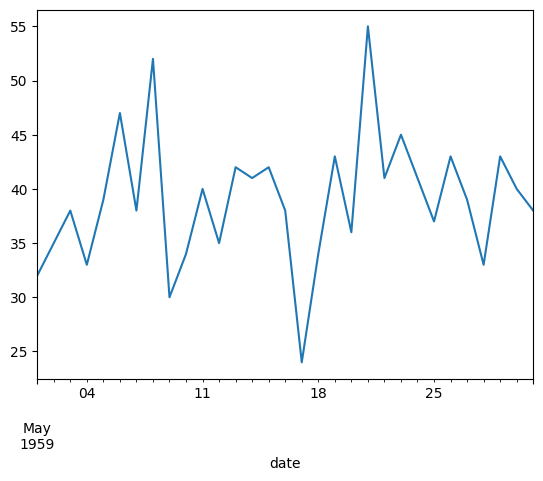

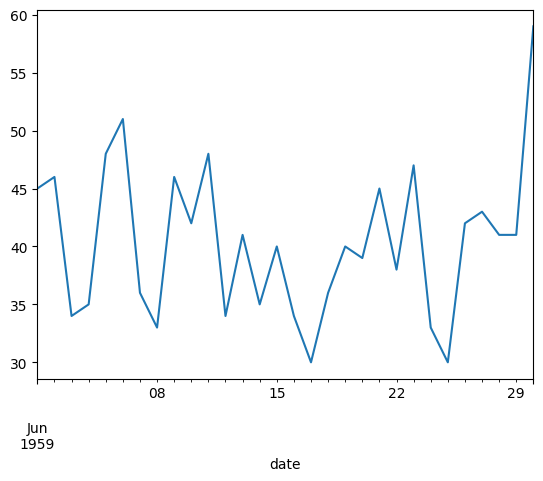

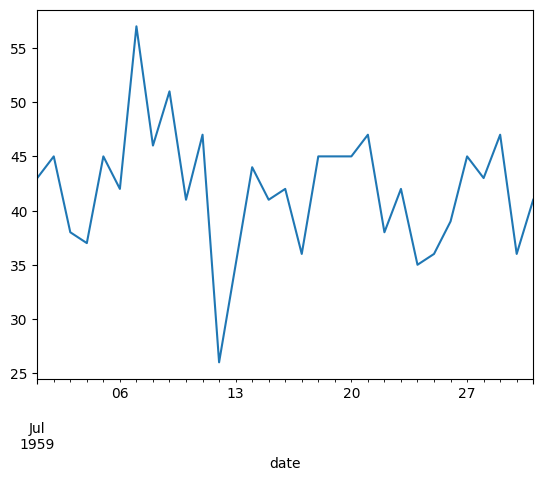

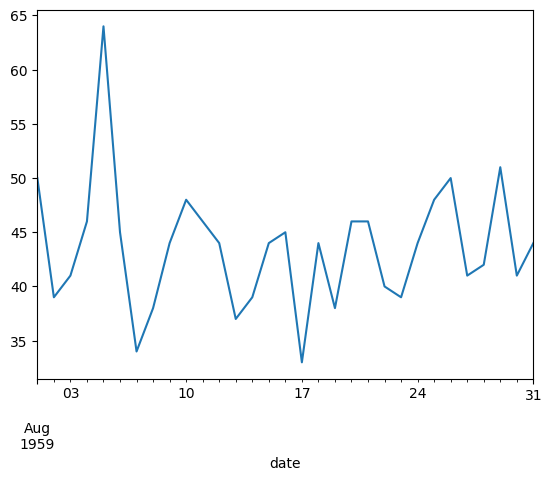

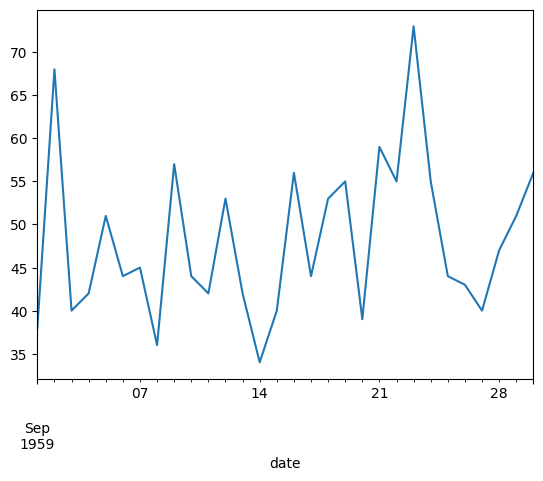

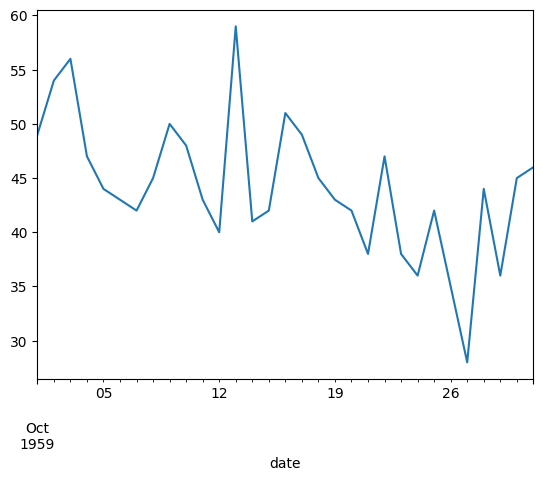

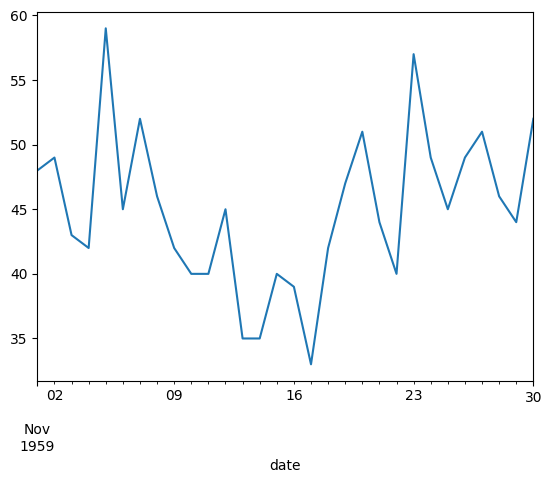

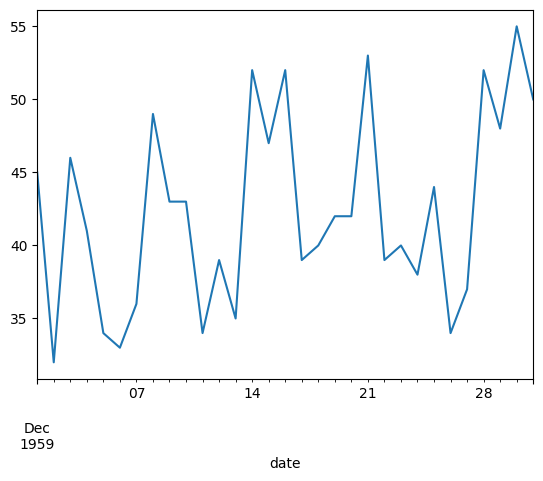

In [34]:
#zoom in particular period

for i in range(1,13):
  plt.clf()
  #plt.figure(figsize = (1,1))
  if i < 10:
    i = '0'+str(i)
  df_viz[f'1959-{i}'].plot()
  plt.show()

<Axes: ylabel='births'>

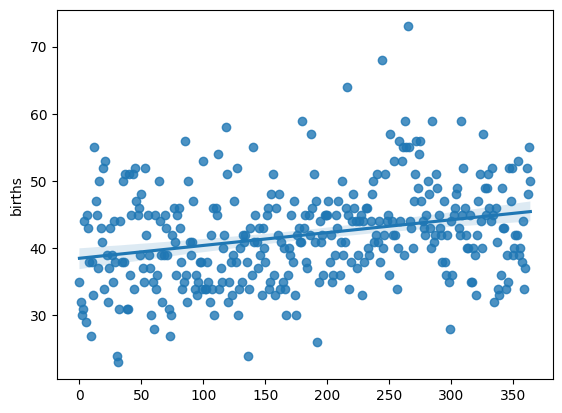

In [35]:
#Trendplot

sns.regplot(x = df.index.values, y = df['births'])

<Axes: ylabel='births'>

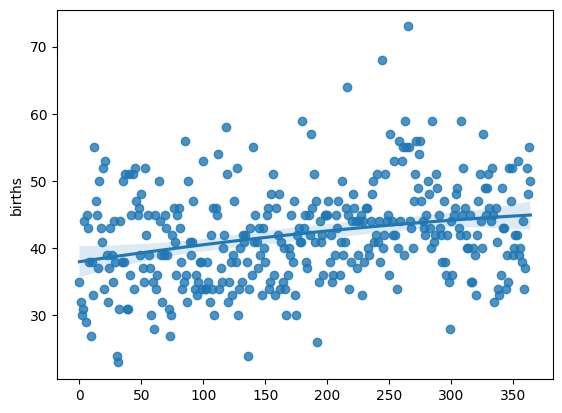

In [36]:
sns.regplot(x = df.index.values, y = df['births'], order = 2)

In [37]:
miles_df = pd.read_csv("drive/MyDrive/Data/us-airlines-monthly-aircraft-miles-flown.csv", parse_dates = [0])

In [38]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


<Axes: >

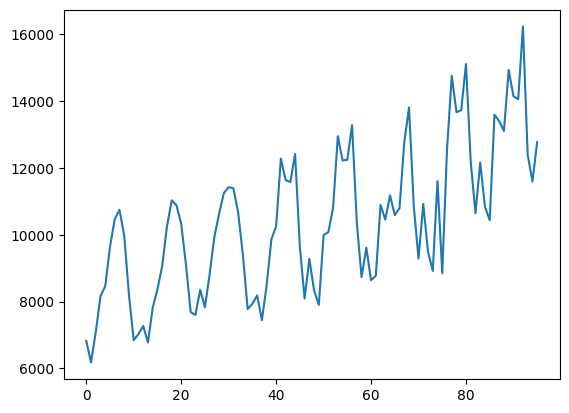

In [39]:
miles_df['MilesMM'].plot()

<Axes: ylabel='MilesMM'>

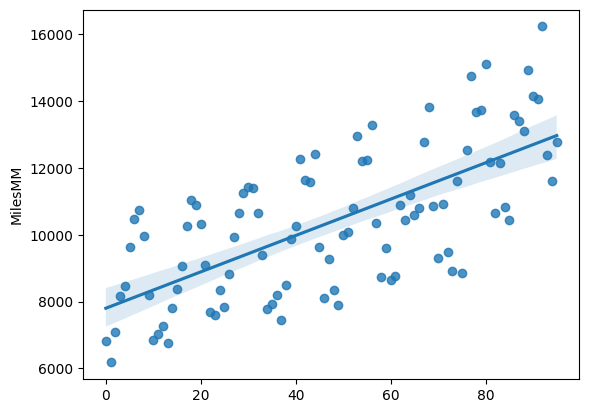

In [40]:
# Trend line

sns.regplot(x = miles_df.index.values, y = miles_df['MilesMM'])

In [41]:
# Removing seasonality

miles_df['year'] = miles_df['Month'].dt.year
miles_df[['Month','MilesMM']].resample('Y', on = 'Month').mean()

,MilesMM
Month,
1963-12-31,8300.250000
1964-12-31,8849.333333
1965-12-31,9619.250000
1966-12-31,9929.500000
1967-12-31,10542.916667
1968-12-31,10747.916667
1969-12-31,11972.000000
1970-12-31,13124.750000


<Axes: xlabel='Month'>

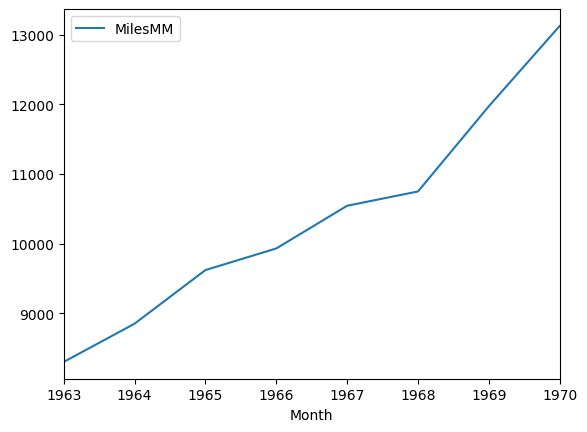

In [42]:
miles_df[['Month','MilesMM']].resample('Y', on = 'Month').mean().plot()

In [43]:
# Creating lag plots
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [44]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<Axes: xlabel='lag1', ylabel='MilesMM'>

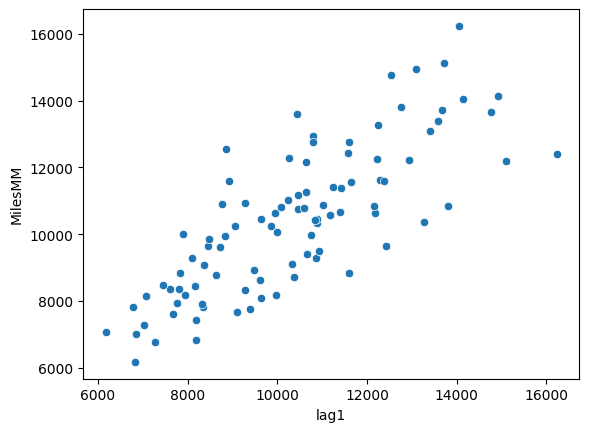

In [45]:
sns.scatterplot(y = miles_df['MilesMM'], x = miles_df['lag1'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

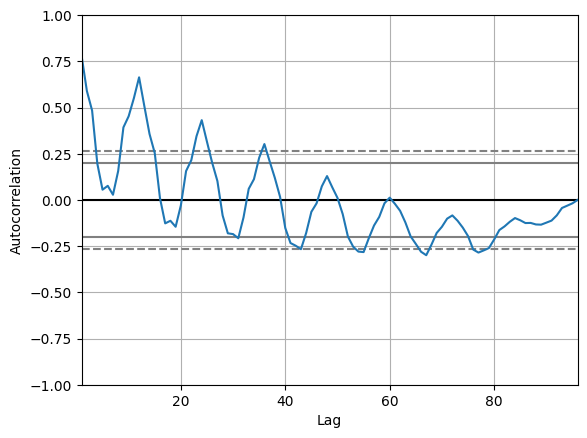

In [46]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(miles_df['MilesMM'])

<Axes: xlabel='Month'>

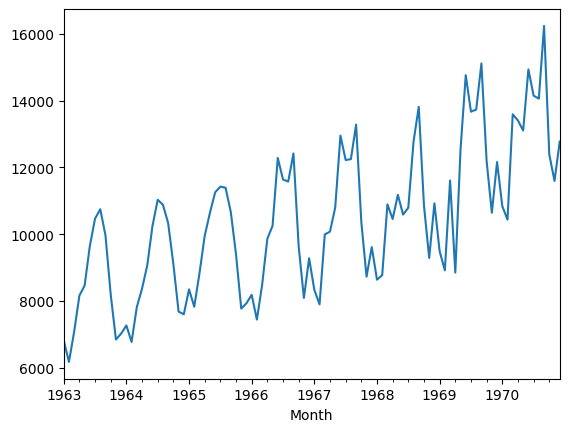

In [64]:
miles_df.set_index('Month')['MilesMM'].plot()

<Axes: >

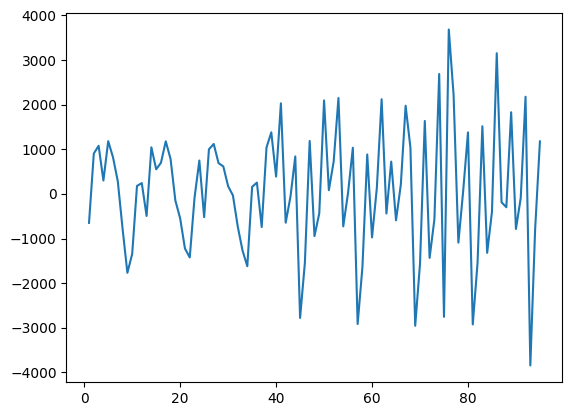

In [63]:
# Differencing -- To remove trend and seasonality

miles_df['diff1'] = miles_df['MilesMM'].diff(periods = 1)
miles_df['diff1'].set_index('Month').plot()

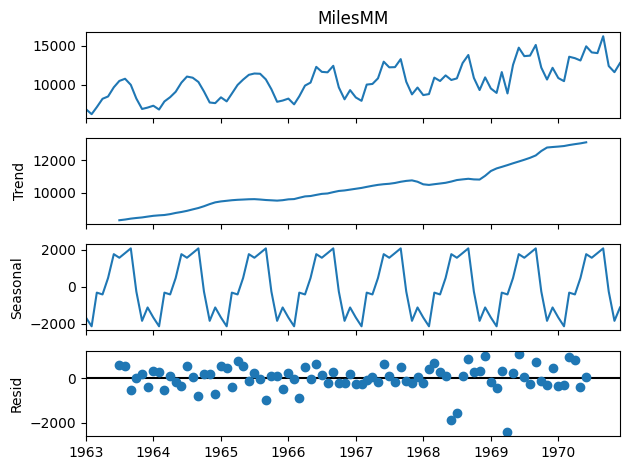

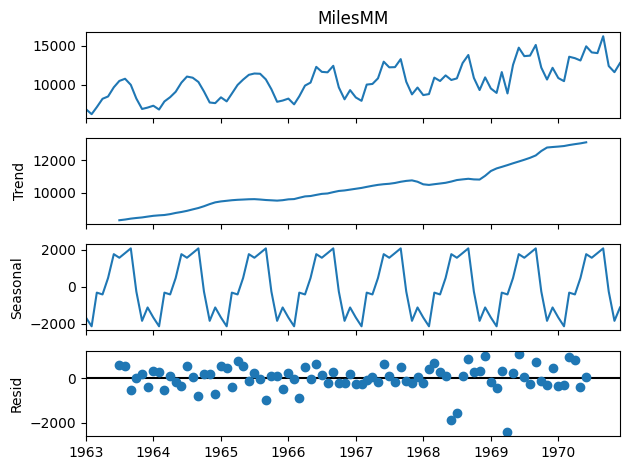

In [54]:
#Trend and Seasonality before differencing
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(miles_df.set_index('Month')['MilesMM'], model = 'additive').plot()

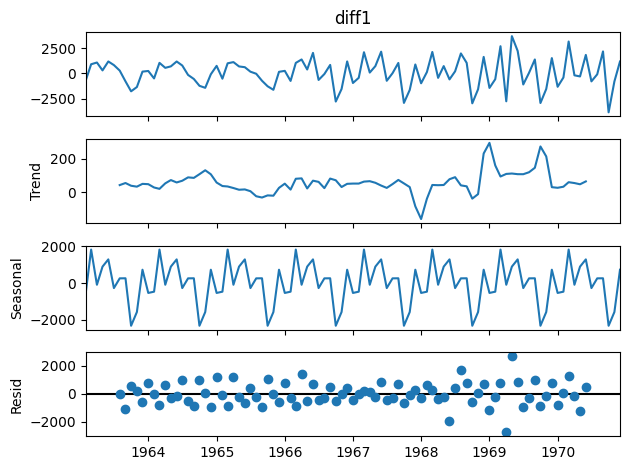

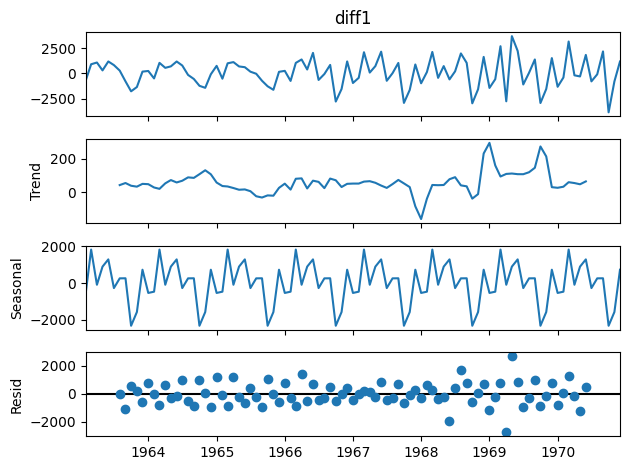

In [56]:
# Trend after differencing using lag 1

seasonal_decompose(miles_df.set_index('Month')['diff1'].iloc[1:], model = 'additive').plot()

<Axes: xlabel='Month'>

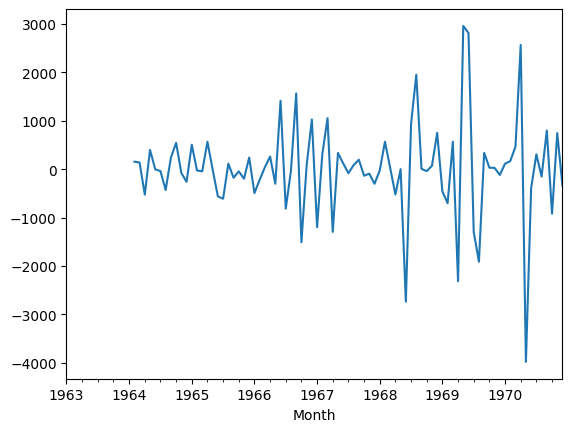

In [65]:
miles_df['diff12'] = miles_df['diff1'].diff(periods = 12)
miles_df.set_index('Month')['diff12'].plot()

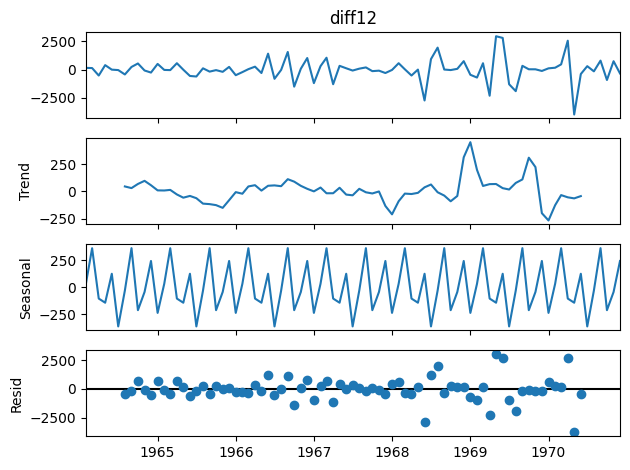

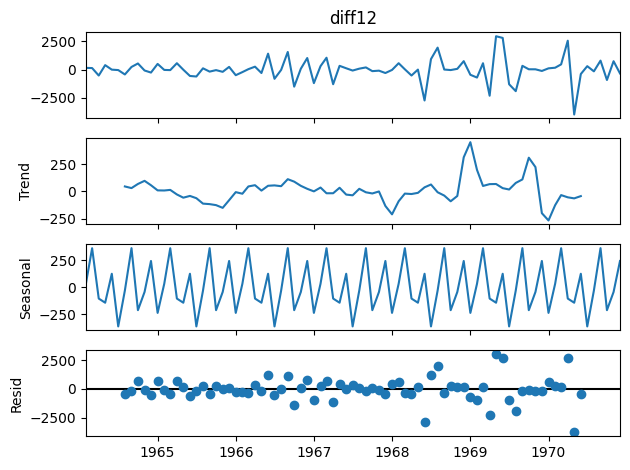

In [62]:
#Seasonality after lag12

seasonal_decompose(miles_df.set_index('Month')['diff12'].iloc[13:], model = 'additive').plot()

In [47]:
help(df.resample)

Help on method resample in module pandas.core.frame:

resample(rule, axis: 'Axis' = 0, closed: 'str | None' = None, label: 'str | None' = None, convention: 'str' = 'start', kind: 'str | None' = None, loffset=None, base: 'int | None' = None, on: 'Level' = None, level: 'Level' = None, origin: 'str | TimestampConvertibleTypes' = 'start_day', offset: 'TimedeltaConvertibleTypes | None' = None, group_keys: 'bool | lib.NoDefault' = <no_default>) -> 'Resampler' method of pandas.core.frame.DataFrame instance
    Resample time-series data.
    
    Convenience method for frequency conversion and resampling of time series.
    The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
    or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
    series/index to the ``on``/``level`` keyword parameter.
    
    Parameters
    ----------
    rule : DateOffset, Timedelta or str
        The offset string or object representing target conversion.
    axis : {0 or '